
# Task 06-Prediction using Decision Tree Algorithm

In this task Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly. 

### Author - Vaibhav Sontakke


***Importing Requires libraries***

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

***Loading Dataset***

In [30]:
df = pd.read_csv("Iris.csv")

In [31]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.shape

(150, 6)

In [33]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1:]

In [34]:
lb = LabelEncoder()

In [35]:
y = lb.fit_transform(y)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

****Decision Tree****

##### Lets train a baseline model

In [37]:
dsc = DecisionTreeClassifier()

In [38]:
dsc

DecisionTreeClassifier()

In [39]:
model = dsc.fit(x_train, y_train)

In [40]:
ypred =  model.predict(x_test)

In [41]:
accuracy_score(ypred, y_test)

0.9333333333333333

##### Tune the model to fit dataset more efficiently

In [42]:
params = {
    'max_leaf_nodes': [None, 2, 10, 20, 150, 200],
    'min_samples_split': [2, 10, 7],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [1,2,3],
    'max_depth':[2,4,10,20,30,40,50,70,150]
}

In [43]:
grd =  GridSearchCV(DecisionTreeClassifier(), params, scoring='accuracy', n_jobs=8, cv=2,verbose=2)

In [44]:
grd.fit(x_train, y_train)

Fitting 2 folds for each of 972 candidates, totalling 1944 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 896 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 1944 out of 1944 | elapsed:    7.9s finished


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 10, 20, 30, 40, 50, 70, 150],
                         'max_leaf_nodes': [None, 2, 10, 20, 150, 200],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 10, 7]},
             scoring='accuracy', verbose=2)

In [45]:
best_params = grd.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [46]:
grd.best_score_

0.95

***Tune the model with best parameters***

In [47]:
bdsc = DecisionTreeClassifier(**best_params)

In [48]:
bdsc

DecisionTreeClassifier(max_depth=4)

In [49]:
model = bdsc.fit(x_train, y_train)

In [50]:
ypred = model.predict(x_test)

In [51]:
accuracy_score(ypred, y_test)

0.9333333333333333

In [52]:
cnf = confusion_matrix(ypred, y_test)

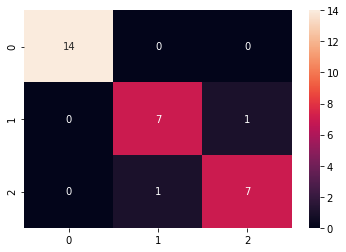

In [53]:
sns.heatmap(cnf, annot=True)